# Décima Primeira Atividade de Processamento Digital de Sinais - ECAC14A #
## Mateus Alexandre M. de Souza - 2021004023 ##
### Exercício 1 ###
Gerar o sinal em Python com duração de 2s. Este sinal será usado para testar os filtros a serem desenvolvidos.

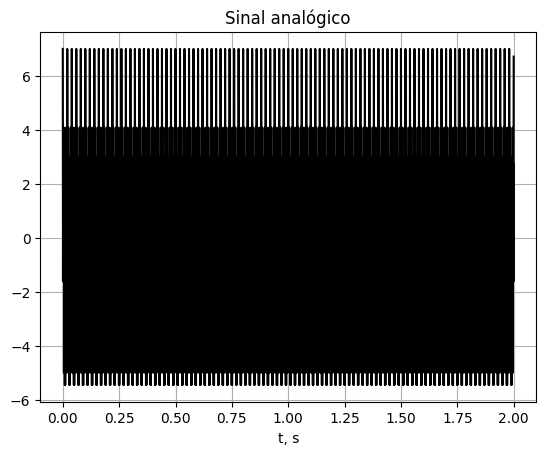

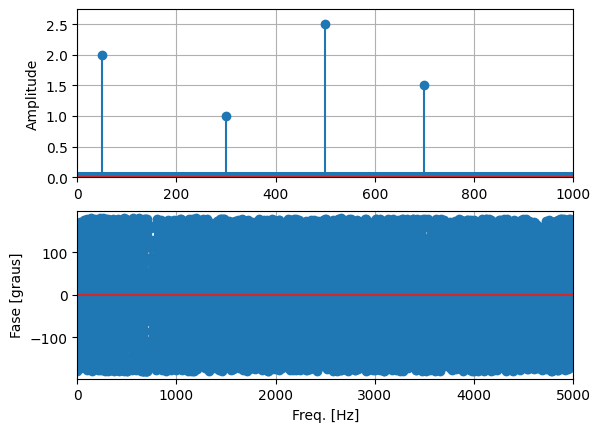

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import espectro
import importlib
importlib.reload(espectro)

fs = 10000
T = 2
ta = np.arange(T*fs)/fs

sa = 2*np.cos(2*np.pi*50*ta) + np.cos(2*np.pi*300*ta) + 2.5*np.cos(2*np.pi*500*ta) + 1.5*np.cos(2*np.pi*700*ta)

plt.figure()
plt.plot(ta,sa,color='k'), plt.grid()
plt.title("Sinal analógico")
plt.xlabel("t, s")


espectro.espectro1D(sa, fs, 2)

### Exercício 2 ###
Projetar um filtro IIR Elíptico para eliminar as componentes (reduzir para menos de 5% de sua amplitude original) 300Hz e 500Hz, usando funções de contrução de filtros do Python (Scipy.signal). É desejável que o filtro não afete (tolerância de ± 5%) as amplitudes das componentes que devem permanecer no sinal.

H(z): <TransferFunction>: sys[28]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.7689 z^6 - 4.459 z^5 + 10.92 z^4 - 14.47 z^3 + 10.92 z^2 - 4.459 z + 0.7689
-----------------------------------------------------------------------------
    z^6 - 5.303 z^5 + 11.88 z^4 - 14.39 z^3 + 9.925 z^2 - 3.696 z + 0.58

dt = 0.0001



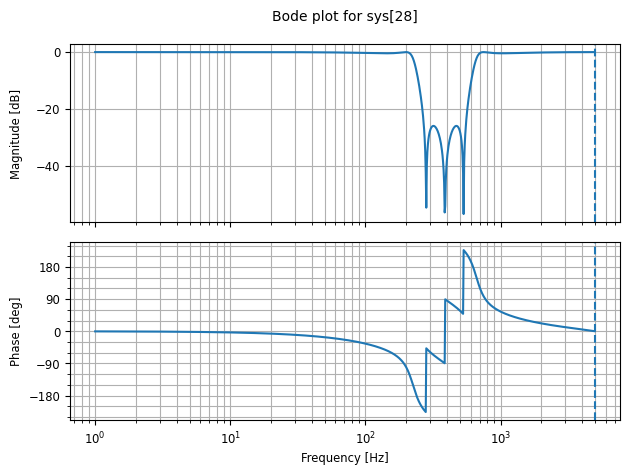

In [68]:
import scipy.signal as sig
import control as ct

n, Wn = sig.ellipord([0.01, 0.14], [0.06, 0.1], 0.424, 26)
num, den = sig.ellip(n, 0.424, 26, Wn, btype='bandstop')

Hz = ct.tf(num,den,dt=1/fs)
print('H(z):',Hz)
ct.bode(Hz, dB=True, Hz=True)


# Exercício 3 #
Fazer uma função Python para implementar o filtro projetado. Esta função deve receber como argumento de entrada somente o sinal a ser filtrado e deve devolver somente o sinal filtrado e não deve conter comandos de construção do filtro. Aplicar esta função no sinal do exercício 1. Forneça o espectro do sinal filtrado que comprova o funcionamento da função de filtragem.

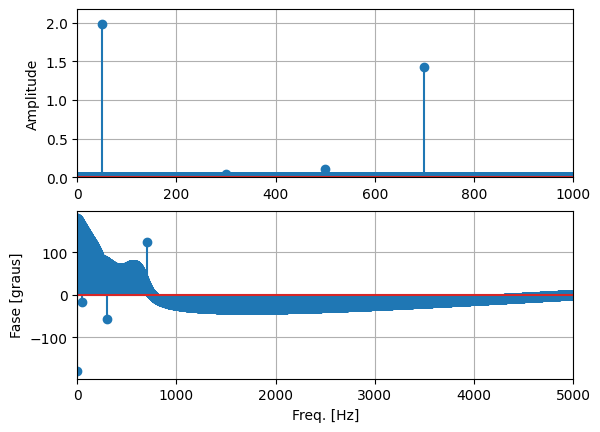

In [69]:
filtered_signal = sig.lfilter(num, den, sa)

espectro.espectro1D(filtered_signal, fs, 3)

# Exercício 4 #
a) Construir um programa em Python para ler o arquivo fornecido, obter suas características (taxa de amostragem, número de canais, profundidade de bits, etc). Plotar o sinal original e seu espectro.

C:\Users\mateu\AppData\Local\Temp\ipykernel_17776\668073783.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = read('ISO-TC121-SC3_high.wav')


number of channels = 1 (data.shape = (50035,))
Frequência de amostragem: 44100Hz


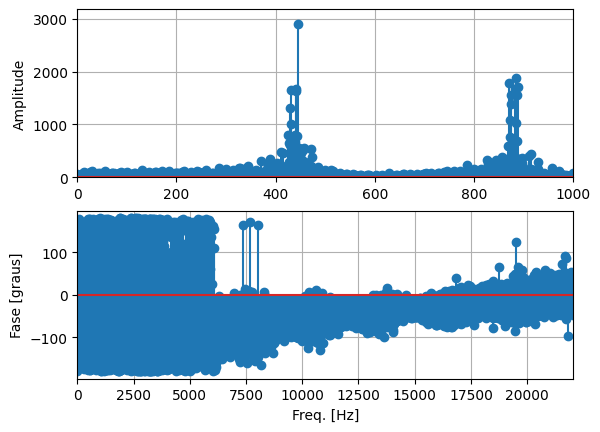

In [70]:
from scipy.io.wavfile import read

samplerate, data = read('ISO-TC121-SC3_high.wav')
print(f"number of channels = 1 (data.shape = {data.shape})")
print(f"Frequência de amostragem: {samplerate}Hz")

espectro.espectro1D(data, samplerate, 1)


c) Projetar um filtro IIR Elíptico para eliminar as componentes (reduzir para menos de 5% de sua amplitude original) 800Hz e 1700Hz, usando funções de contrução de filtros do Python (Scipy.signal). É desejável que o filtro não afete (tolerância de ± 5%) as amplitudes das componentes que devem permanecer no sinal. Para o filtro projetado, apresentar os mesmos itens solicitados na questão 2.

H(z): <TransferFunction>: sys[30]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.8495 z^14 - 11.7 z^13 + 74.95 z^12 - 296.4 z^11 + 807.7 z^10 - 1605 z^9 + 2398 z^8 - 2738 z^7 + 2398 z^6 - 1605 z^5 + 807.7 z^4 - 296.4 z^3 + 74.95 z^2 - 11.7 z + 0.8495
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  z^14 - 13.45 z^13 + 84.21 z^12 - 325.3 z^11 + 866.1 z^10 - 1681 z^9 + 2454 z^8 - 2735 z^7 + 2340 z^6 - 1529 z^5 + 751.5 z^4 - 269.2 z^3 + 66.46 z^2 - 10.12 z + 0.7175

dt = 2.2675736961451248e-05



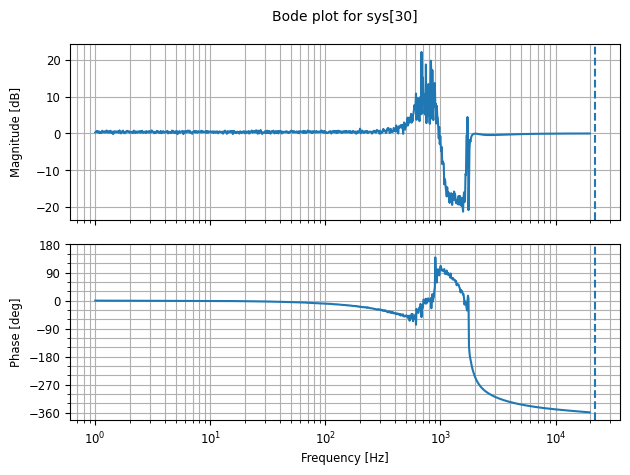

In [71]:
#Projetar um filtro IIR Elíptico para eliminar as componentes (reduzir para menos de 5% de sua amplitude original) 800Hz e 1700Hz, usando funções de contrução de filtros do Python (Scipy.signal). É desejável que o filtro não afete (tolerância de ± 5%) as amplitudes das componentes que devem permanecer no sinal. Para o filtro projetado, apresentar os mesmos itens solicitados na questão 2.

n, Wn = sig.ellipord([0.035, 0.078] , [0.036, 0.077], 0.424, 26)
num, den = sig.ellip(n, 0.424, 26, Wn, btype='bandstop')
    
Hz = ct.tf(num,den,dt=1/samplerate)
print('H(z):',Hz)
ct.bode(Hz, dB=True, Hz=True)


d) Aplicar o filtro projetado no sinal de áudio, utilizando funções da biblioteca do Python. Apresentar
o espectro do sinal filtrado. 

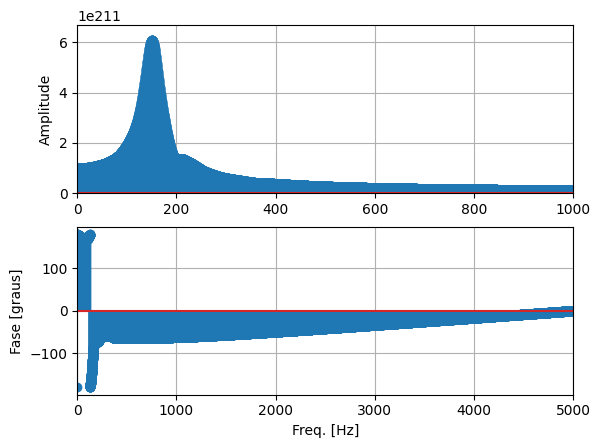

In [72]:
import espectro
import importlib
importlib.reload(espectro)

filtered_signal = sig.lfilter(num, den, data)

espectro.espectro1D(filtered_signal, fs, 1)